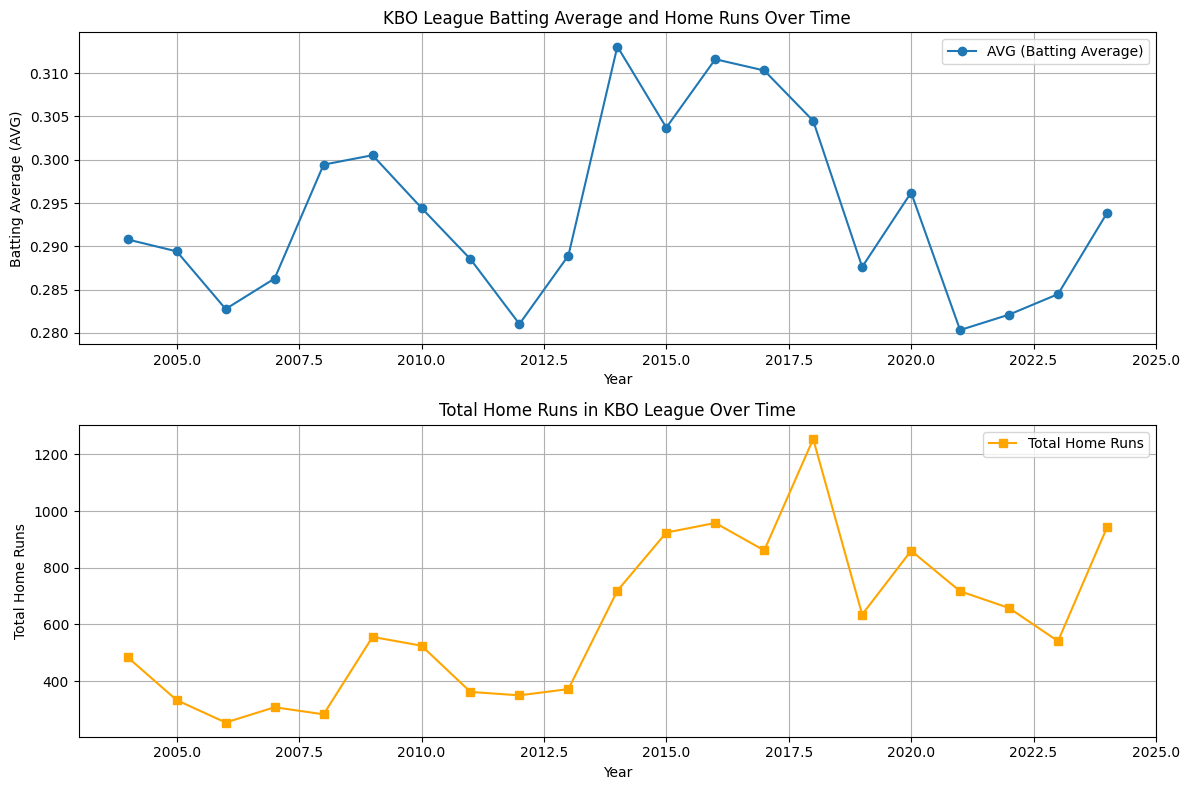

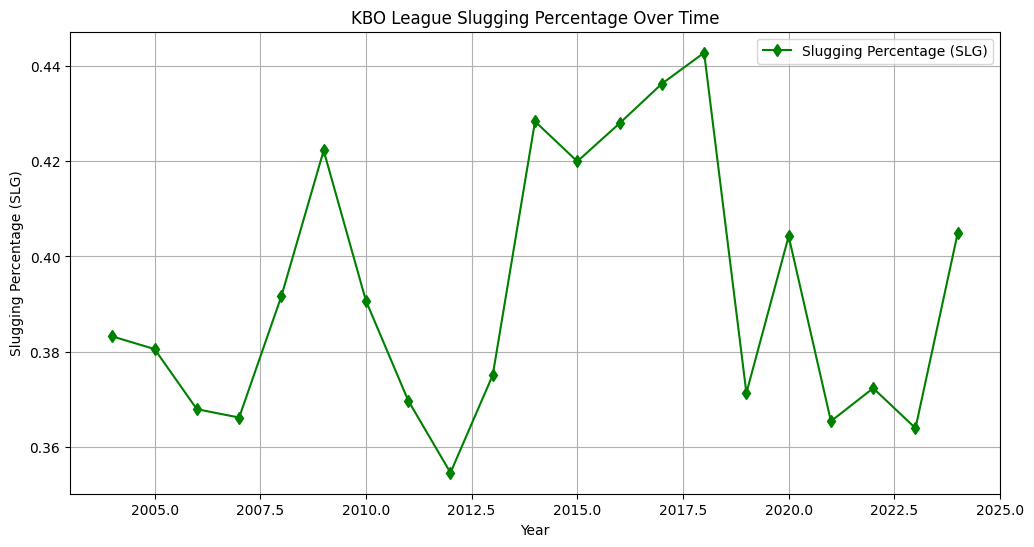

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/kbo_Hitter_data.csv'
data = pd.read_csv(file_path)

# Ensure necessary columns are numeric
data['AVG'] = pd.to_numeric(data['AVG'], errors='coerce')
data['HR'] = pd.to_numeric(data['HR'], errors='coerce')
data['PA'] = pd.to_numeric(data['PA'], errors='coerce')
data['TB'] = pd.to_numeric(data['TB'], errors='coerce')

# Group by year to calculate key metrics
yearly_stats = data.groupby('Year').agg(
    avg_AVG=('AVG', 'mean'),
    total_HR=('HR', 'sum'),
    total_PA=('PA', 'sum'),
    total_TB=('TB', 'sum')
).reset_index()

# Calculate slugging percentage approximation (TB/PA)
yearly_stats['SLG'] = yearly_stats['total_TB'] / yearly_stats['total_PA']

# Plotting the trends
plt.figure(figsize=(12, 8))

# Average Batting Average Trend
plt.subplot(2, 1, 1)
plt.plot(yearly_stats['Year'], yearly_stats['avg_AVG'], marker='o', label='AVG (Batting Average)')
plt.title('KBO League Batting Average and Home Runs Over Time')
plt.ylabel('Batting Average (AVG)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()

# Home Runs Trend
plt.subplot(2, 1, 2)
plt.plot(yearly_stats['Year'], yearly_stats['total_HR'], marker='s', label='Total Home Runs', color='orange')
plt.title('Total Home Runs in KBO League Over Time')
plt.ylabel('Total Home Runs')
plt.xlabel('Year')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Slugging percentage trend plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['Year'], yearly_stats['SLG'], marker='d', label='Slugging Percentage (SLG)', color='green')
plt.title('KBO League Slugging Percentage Over Time')
plt.ylabel('Slugging Percentage (SLG)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()